# Success: Hard work or Luck?

#### Inspired by Veritasium youtube video
https://www.youtube.com/watch?v=3LopI4YeC4I

Let's say that your success is based on 95% of hard work and 5% of luck. We'll check how important luck in fact is - does it really have almost no impact at all?

In order to check it, we'll use the model briefly mentioned in the video (link above). Let's imagine that we have a bunch of hockey players, each of them has some random luck assigned and they also worked hard for their success. Both values are from range (0,1), luck has the weight of 0.05 and hard work 0.95. We assume that only 1% of the best players from the sample will achieve a success.  

We can think about two hipothesis:
- luck does not play very important role in success,
- luck plays important role in success.

We'll come back later to the statements above to precisise them.

First, we'll write a class that generates a player with random values for hard work and luck. Then, the overall score of a player is calculated.

In [70]:
from random import random

class Player:
    def __init__(self, p, id_n=None):
        # p - luck contribution in overall score, float (0, 1)
        self.luck = random()
        self.hard_work = random()
        self.overall_score = (self.hard_work * (1 - p)) + (self.luck * p)
        self.id_n = id_n

Then, let's write some helper functions that we'll use for a simple data generation and pre-analysis.

In [90]:
def generate_players(n, p):
    players = []
    for i in range(0, n):
        player = Player(p, id_n=i)
        players.append(player)
    return players

def sort_players_by_score(players):
    players.sort(key=lambda x: x.overall_score)
    
def sort_players_by_work(players):
    players.sort(key=lambda x: x.hard_work)
    
def print_players(players):
    print('Hard work\t\t', 'Luck\t\t\t', 'Overall Score')
    for i in range(0, len(players)):
        print(players[i].hard_work, '\t', players[i].luck, '\t', players[i].overall_score)
        
def count_mean_values(players):
    mean_luck, mean_work, mean_score = 0, 0, 0
    for i in players:
        mean_luck += i.luck*(1/len(players))
        mean_work += i.hard_work*(1/len(players))
        mean_score += i.overall_score*(1/len(players))
    return mean_work, mean_luck, mean_score


def get_players_id_list(players):
    ids = []
    for i in players:
        ids.append(i.id_n)
    return ids


Now we can generate some players and sort them by the best overall score. We'll consider 1% of the best players as those who achieved success.

In [91]:
n, p = 10000, 0.05
players = generate_players(n, p)
sort_players_by_score(players)

winners = players[int(0.99*n):]
winners_ids = get_players_id_list(winners)

print_players(winners)

Hard work		 Luck			 Overall Score
0.982016471546085 	 0.7479417250376933 	 0.9703127342206653
0.9741817871726884 	 0.9022898097254841 	 0.9705871883003282
0.982897715452163 	 0.7371696490758243 	 0.970611312133346
0.9876992594504002 	 0.6481138116738945 	 0.9707199870615748
0.9730188282060247 	 0.9284020112897146 	 0.9707879873602092
0.9732910026125194 	 0.9240606114420938 	 0.9708294830539982
0.9833597112882461 	 0.7359329433204138 	 0.9709883728898544
0.9893593391597005 	 0.6276523136636534 	 0.9712739878848982
0.9795822714642798 	 0.8169635166018459 	 0.971451333721158
0.9781415181593384 	 0.848284596890063 	 0.9716486720958746
0.9881499800360953 	 0.6583598273662268 	 0.9716604724026018
0.9804092636408891 	 0.8058392282111941 	 0.9716807618694043
0.98273105782298 	 0.762553384953544 	 0.9717221741795081
0.9886723797608578 	 0.649919232761034 	 0.9717347224108666
0.9884733384975088 	 0.6555558763402517 	 0.971827465389646
0.9755283535732243 	 0.9019841284263803 	 0.9718511423158821


And let's check how different will be the list of winners if we take into consideration only hard work (i.e. if we ignore the luck).

In [92]:
sort_players_by_work(players)
hard_workers = players[int(0.99*n):]

hard_workers_ids = get_players_id_list(hard_workers)
print_players(hard_workers)

Hard work		 Luck			 Overall Score
0.9910242589611046 	 0.39333927241758204 	 0.9611400096339283
0.9910619116150972 	 0.8861674238124544 	 0.9858171872249649
0.9912424279304635 	 0.7921634015150831 	 0.9812884766096944
0.991273287892035 	 0.927410519424768 	 0.9880801494686715
0.9913605644419572 	 0.17100242159473478 	 0.950342657299596
0.9915347617755863 	 0.8366130531449312 	 0.9837886763440535
0.9916363414682644 	 0.6919602910155707 	 0.9766525389456296
0.9916968487905169 	 0.7083854514683381 	 0.9775312789244079
0.9918134042814504 	 0.5614916449059734 	 0.9702973163126765
0.9918169127812654 	 0.46959257975220936 	 0.9657056961298125
0.9918482370882622 	 0.11180644916690918 	 0.9478461476921946
0.991852630290944 	 0.6359782048402849 	 0.9740589090184109
0.9918867414454884 	 0.29633236797474716 	 0.9571090227719513
0.9920322206417922 	 0.3408584750320989 	 0.9594735333613076
0.9921023766525995 	 0.3485083221654378 	 0.9599226739282414
0.9922150582528299 	 0.30005157204676836 	 0.95760

We can now print ids of players from both groups.

In [93]:
print(winners_ids)

[866, 6535, 6242, 3841, 6666, 8577, 1674, 6621, 7640, 2911, 240, 6271, 3711, 9450, 4300, 8409, 4357, 4560, 9017, 9710, 6415, 9228, 3758, 6051, 2075, 4331, 5972, 6928, 2765, 900, 5779, 8649, 6549, 3613, 798, 6022, 581, 8324, 7447, 519, 1745, 7495, 8798, 5666, 5925, 1198, 4476, 1118, 9596, 5781, 63, 3533, 4605, 8525, 9491, 7169, 8323, 3950, 7642, 1597, 3102, 6552, 3969, 578, 8343, 4122, 5533, 6281, 755, 5791, 4153, 4651, 9751, 2490, 7532, 723, 6682, 5287, 4263, 4910, 2341, 4742, 5394, 4301, 6530, 1996, 5404, 9605, 3986, 7293, 6313, 1451, 6922, 6878, 9419, 8570, 8777, 8256, 1510, 3863]


In [94]:
print(hard_workers_ids)

[9493, 723, 3102, 4301, 2011, 4651, 519, 5925, 5707, 1210, 4164, 2765, 7592, 8544, 7868, 6932, 6799, 2267, 8355, 1996, 1745, 1451, 5404, 5175, 2062, 3478, 6140, 4070, 6313, 4704, 464, 9751, 3758, 3398, 5993, 8213, 6878, 1419, 5012, 19, 8612, 6051, 1198, 6002, 6922, 1152, 4910, 8514, 9470, 8910, 581, 8777, 9419, 903, 5533, 4560, 2126, 5329, 5782, 1333, 6160, 5558, 755, 4270, 6971, 3969, 8570, 8256, 7293, 3986, 4357, 4263, 4273, 8525, 7447, 9605, 5781, 1573, 2035, 7169, 5009, 3643, 7532, 1744, 300, 2776, 3553, 6530, 5501, 3613, 9395, 3863, 2490, 1510, 6267, 6281, 1740, 4331, 4002, 4476]


And let's check what percentage of players falls into both groups at the same time, i.e. how many players will be still successfull if the luck doesn't play any role in their carrier, only hard work.

In [98]:
len((set(hard_workers_ids) & set(winners_ids)))/len(winners_ids)

0.46

From the above analysis we see that around half of the winners achieved success by luck - there were better players but with less of luck, so they fit only to harworkers list but not to winners list. 

We can also check mean values of luck, hard work and overall score in both groups.

In [96]:
winners_means = count_mean_values(winners)
hard_workers_means = count_mean_values(hard_workers)

In [97]:
from tabulate import tabulate
print(tabulate([['winners', winners_means[0], winners_means[1], winners_means[2]],
              ['hard workers\t', hard_workers_means[0], hard_workers_means[1], hard_workers_means[2]]],
              headers=['', 'mean work', 'mean luck', 'mean score'], tablefmt='orgtbl'))

|              |   mean work |   mean luck |   mean score |
|--------------+-------------+-------------+--------------|
| winners      |    0.9887   |    0.814444 |     0.979988 |
| hard workers |    0.995441 |    0.491993 |     0.970268 |


In the table above we see that players in hard workers list have mean luck around 0.5, which seems fine, because for them this value should be random. However winners have significantly higher mean value of luck, around 80%. Just a raw mean value of luck is not the best indicator here but it gives us some idea what we can expect and what to look for. 

We can reconsider now the hipothesises mentioned at the begining. What does it mean that the luck plays important role or not?

According to the model, luck contributes only 5% to the overall success of a player. So we can expect that similar percentage of players in the winners list should be affected when removing that value from the overall score. That's our first hipothesis: 'luck does not play important role in the success'. We'll say that it's true, when winners and hard workers lists differ in around 0-10%.

And as for the second hipothesis 'luck plays important role in success', we'll consider it as confirmed when the differences between players in winners and hard workers lists is greater than 25%. In this case 5% of luck contribution will contribute to more than 5-times bigger change between those lists.

And how about the case when the difference is between 10% and 25%? Well, we won't have none of hypothesises confirmed than and it will mean that it's hard to say wheather luck really plays important role or not in the overall success.

Now let's think about a more robust way to run the model. We'll run some Monte Carlo simulations and then analyse the results.

In [100]:
def simulate_get_diff_list(Msc, n, p):
    results = []
    for i in range(0, Msc):
        players = generate_players(n, p)
        
        sort_players_by_score(players)
        winners = players[int(0.99*n):]
        winners_ids = get_players_id_list(winners)
        
        sort_players_by_work(players)
        hard_workers = players[int(0.99*n):]
        hard_workers_ids = get_players_id_list(hard_workers)
        
        diff = len((set(hard_workers_ids) & set(winners_ids)))/len(winners_ids)
        results.append(diff)

    return results
        

In [102]:
results = simulate_get_diff_list(1000, 10000, 0.05)

The line above performes 1000 times the simulation made before and returns a list with percentage of players that were successfull with and without luck at each run.  

In [108]:
import matplotlib.pyplot as plt

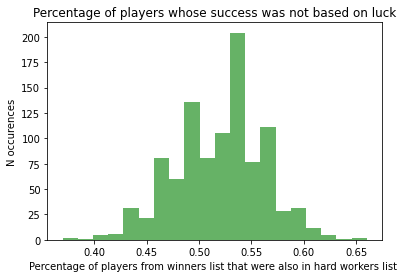

In [126]:
plt.hist(results, 20, facecolor='g', alpha=0.6)
plt.title("Percentage of players whose success was not based on luck")
plt.ylabel("N occurences")
plt.xlabel("Percentage of players from winners list that were also in hard workers list ")
plt.show()

In [128]:
import statistics
print("Median:\t", statistics.median(results))
print("Mean:\t", statistics.mean(results))

Median:	 0.52
Mean:	 0.51971


As we can see from the performed simulations, almost half of the players that were successful, wouldn't have been at the top without being lucky. Even if there were betters players than them, they lacked enough luck in order to achieve a success.   

How to interpret this result?
We assumed at the begining that only 1% of all players will achieve success. This is a very small fraction of players, so all of them have almost maximal possible hard work value. The fact that this value was very similar among them at the top of the list, the secondary luck started to play a bigger role. Even if it contributed to only 5% of overall score, it was enough to ruin carreers of the half of the best players and to move to the top weaker ones.  

This allows us to conclude that the second hypothesis is true: luck indeed plays important role in achieving success.

Things to consider
- Is hard work evenly distributed among the population of players? (And luck too.)
- Maybe another distribution of hard work and luck values? Gauss?
- How the simulation will perform for a different contribution of luck to the overall success? 
- What else we can do to test the importance of luck?